In [1]:
## Project: TMDb movie data analysis

## Table of Contents
#<ul>
#<li><a href="#intro">Introduction</a></li>
#<li><a href="#wrangling">Data Wrangling</a></li>
#<li><a href="#eda">Exploratory Data Analysis</a></li>
#<li><a href="#conclusions">Conclusions</a></li>
#</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue
columns names in the dataset
(id	imdb_id	popularity	budget	revenue	original_title	cast	homepage	director	tagline	keywords	overview	runtime	genres	production_companies	release_date	vote_count	vote_average	release_year	budget_adj	revenue_adj)



### Question(s) for Analysis
1)actors with the most apperance
2)Top 10 movies based on their adjusted revenue
3)top movies based on thier popularity
4)top movies based on their adjusted budget
5)movies based on their average vote
6)movie ratings distribution all over the years
7)Correlations


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    99% |████████████████████████████████| 10.4MB 9.5MB/s eta 0:00:011   10% |███▎                            | 1.1MB 25.6MB/s eta 0:00:01    36% |███████████▉                    | 3.9MB 27.5MB/s eta 0:00:01    50% |████████████████▏               | 5.3MB 28.8MB/s eta 0:00:01    77% |█████████████████████████       | 8.1MB 28.3MB/s eta 0:00:01    84% |███████████████████████████     | 8.8MB 28.9MB/s eta 0:00:01    99% |███████████████████████████████▉| 10.4MB 10.6MB/s eta 0:00:01    100% |████████████████████████████████| 10.5MB 1.8MB/s 
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01   12% |███▉                            | 1.6MB 27.5MB/s eta 0:00:01    21% |██████▉                         | 2.8MB 22.4MB/s eta 0:00:01    50% |████████████████                | 6.7MB 25.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successful

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
mydata=pd.read_csv('tmdb-movies.csv')


In [6]:
print(mydata.shape)

(10866, 21)


In [7]:
mydata.head(3)

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline      ...       \
0           The park is open.      ...        
1          What a Lovely Day.      ...        
2  One Choice Can Destroy You   

In [8]:
mydata.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
mydata.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning


In [10]:
###removing nan values from cast column, keeping only movies, that has casted actors
###also removing rows where revenue_adj and budget_adj is equal to zero
mydata = mydata[mydata["cast"].isnull() == False]
mydata = mydata[mydata["genres"].isnull() == False]

mydata = mydata[mydata.budget_adj != 0]
mydata = mydata[mydata.revenue_adj != 0]

In [11]:
###describtion of data ######


mydata.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                  id   popularity        budget       revenue      runtime  \
count    3851.000000  3851.000000  3.851000e+03  3.851000e+03  3851.000000   
mean    39879.405609     1.192507  3.723839e+07  1.077619e+08   109.224357   
std     67232.582887     1.475367  4.220955e+07  1.765869e+08    19.923400   
min         5.000000     0.001117  1.000000e+00  2.000000e+00    15.000000   
25%      6072.500000     0.463246  1.000000e+07  1.361474e+07    95.000000   
50%     11319.000000     0.798104  2.400000e+07  4.486219e+07   106.000000   
75%     38577.000000     1.371352  5.000000e+07  1.242887e+08   119.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   338.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  3851.000000   3851.000000   3851.000000  3.851000e+03  3.851000e+03  
mean    528.144118      6.168294   2001.262270  4.427949e+07  1.371632e+08  
std     880.170237      0.794736     11.284113  4.480720e+07  2.16

<a id='eda'></a>
## Exploratory Data Analysis






In [10]:
### Research Question 1 (actors with the most apperance?)

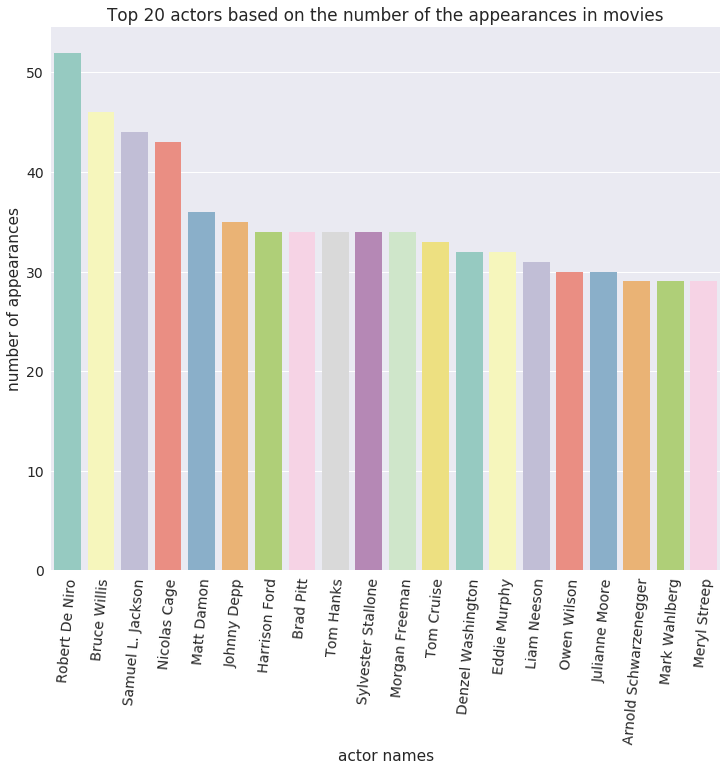

In [12]:
actor_dict = {}

actors = mydata["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                


sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show()

In [12]:
#as the figure above  robert de niro appears the most 

### Research Question 2  (Top 10 movies based on their adjusted revenue)

In [39]:

revenue_dict = {}

#fetching different columns with 2 different ways of code
movies_and_revenue = mydata[["original_title", "revenue_adj"]]
movies_and_budget = mydata[['original_title','budget_adj']]
movies_and_popularity = mydata[['original_title','popularity']]
movies_and_votes= mydata[['original_title','vote_average']]




sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)
##function for bar_plot
def bar_plot(arg1 , arg2 , arg3 , arg4 ,arg5):
    ax = sns.barplot(
    arg1.sort_values(by = arg2, ascending=False).head(arg3).original_title, 
    arg1.sort_values(by = arg2, ascending=False).head(arg3).revenue_adj)
    
    





#rotate x-axis' text
    for item in ax.get_xticklabels():
        item.set_rotation(85)
    ax.set(xlabel='movie titles', ylabel=arg4, title = arg5)
    
    

    

    
    plt.show()



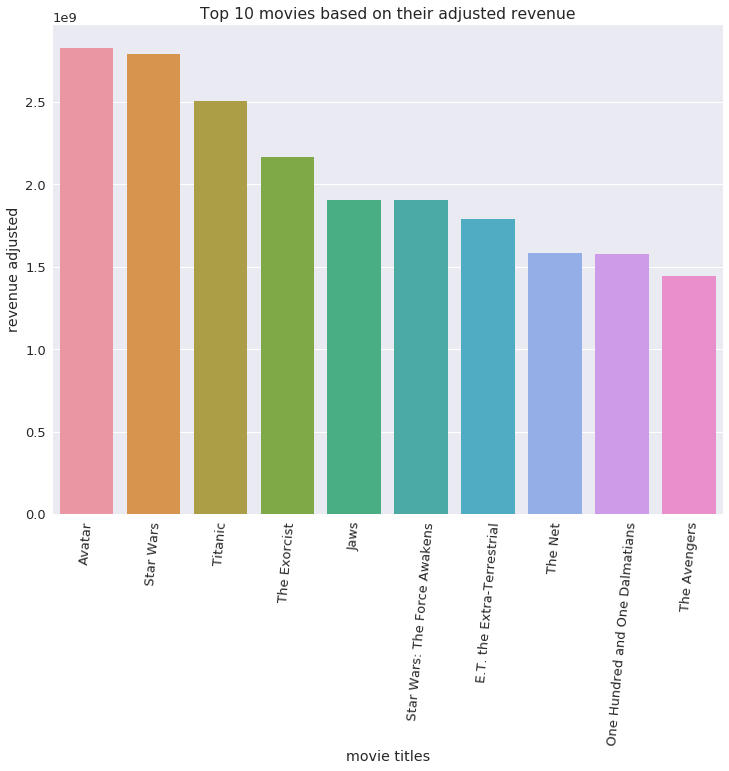

In [40]:
bar_plot(movies_and_revenue,'revenue_adj',10,'revenue adjusted','Top 10 movies based on their adjusted revenue')

In [14]:
#as figure above  the top 5 movies from the given dataset based on their adjusted revenue are the followings; Avatar, Star Wars, Titanic, The Exorcist and Jaws.


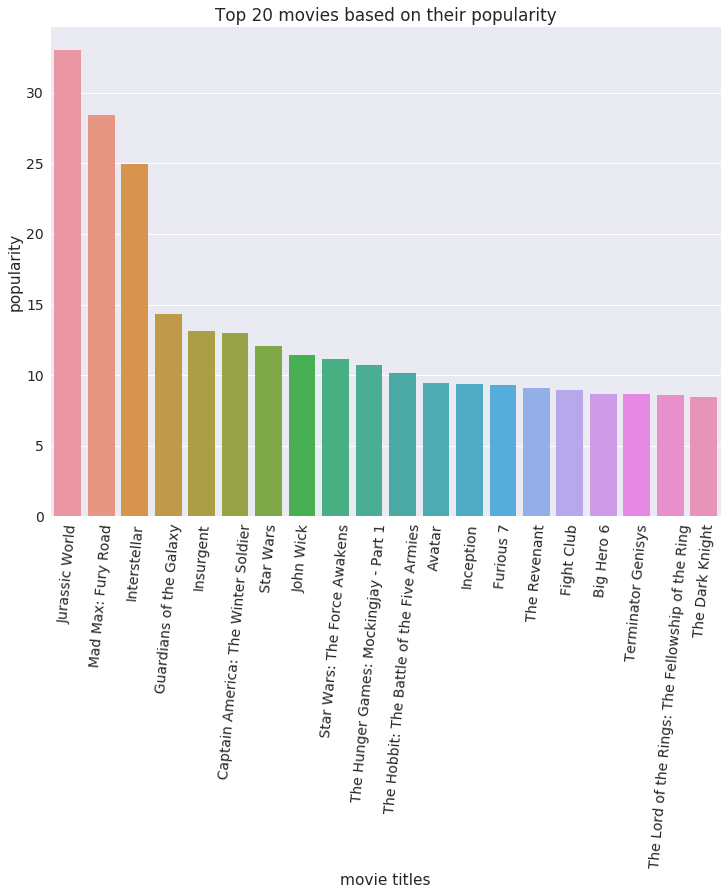

In [43]:
### Research Question 3  (top movies based on thier popularity)
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(20).original_title, 
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(20).popularity)


#rotate x-axis' text
for item in ax.get_xticklabels():
       item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 20 movies based on their popularity')
plt.show()



In [16]:
##as the figure above jurassic world is the most popular movie

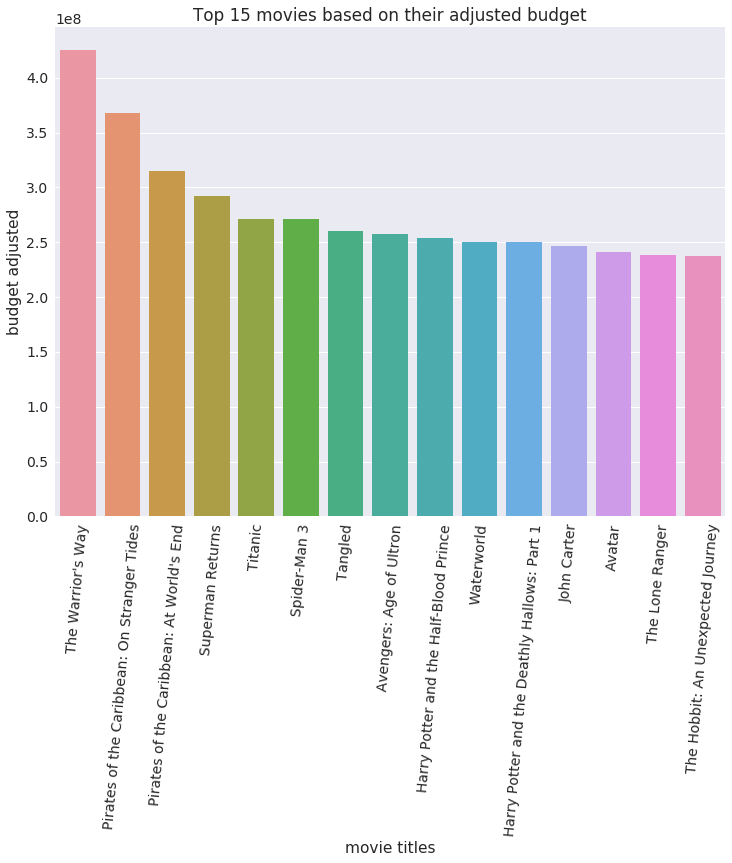

In [44]:
## Research Question4  top movies based on their adjusted budget
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_budget.sort_values(by="budget_adj", ascending=False).head(15).original_title, 
    movies_and_budget.sort_values(by="budget_adj", ascending=False).head(15).budget_adj)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='budget adjusted', title = 'Top 15 movies based on their adjusted budget')
plt.show()

In [18]:
##as figure above top 5 movies from the given dataset based on their adjusted budget are the followings; The Warrior's Way, Pirates of the Caribbean: On Strange Tides, Pirates of the Caribbean: At World's Ends, Superman Returns, Titanic.




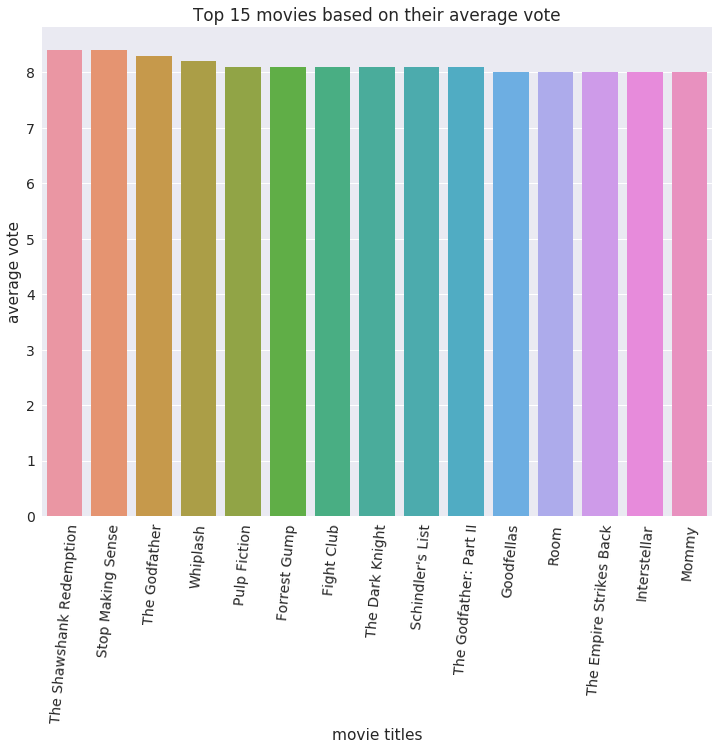

In [45]:
####  Research Question5 movies based on their average vote
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(15).original_title, 
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(15).vote_average)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='average vote', title = 'Top 15 movies based on their average vote')
plt.show()

In [20]:
## the top 5 movies from the given dataset based on their adjusted budget are the followings; The Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash and Pulp Fiction.

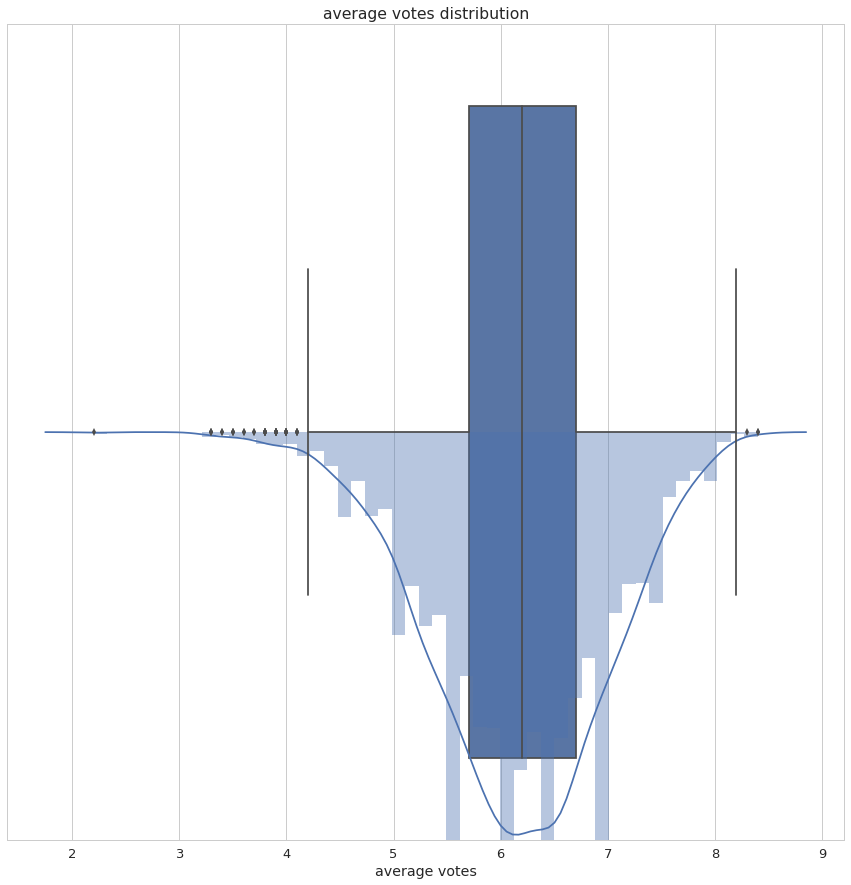

In [46]:
#movie ratings' distribution all over the years
#####

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = mydata[["vote_average"]]


sns.set_style("whitegrid")
ax = sns.distplot(temp_df.vote_average)

ax = sns.boxplot(x = temp_df.vote_average)

ax.set(xlabel='average votes', title = 'average votes distribution')
plt.show()

In [22]:
#The above code creates a boxplot which illustrates their mean which is about 6. Also two plots were created; one with the distribution of the ratings from 1960 to 2015 and another with the ratings distribution from by year.

In [47]:
##Question 6: Correlations

##This section deals with the correlations. The creation of this part was depend on the Question3,4,5 where we were looking at the top  movies based on some characteristics (adjusted revenue, adjusted budget, popularity and average votes). We were expecting that regardless the features the top 5 movies would be the same.The code below produce scatterplots with pairs of these 4 variables.

Text(0.5,0.98,'scatterplot and correlation for popularity and vote_average')

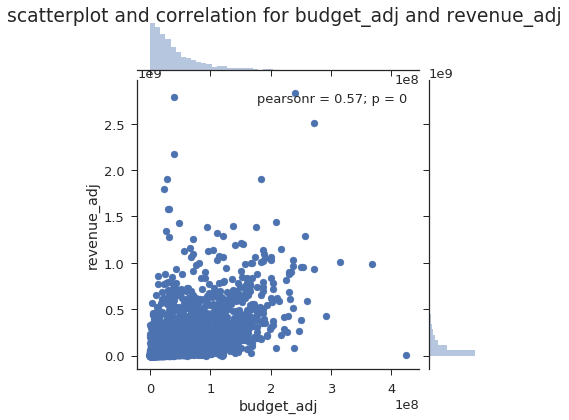

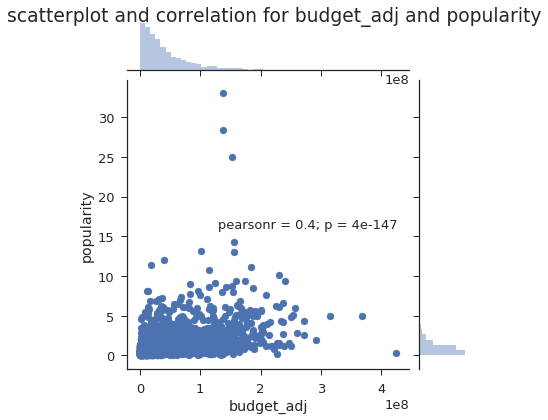

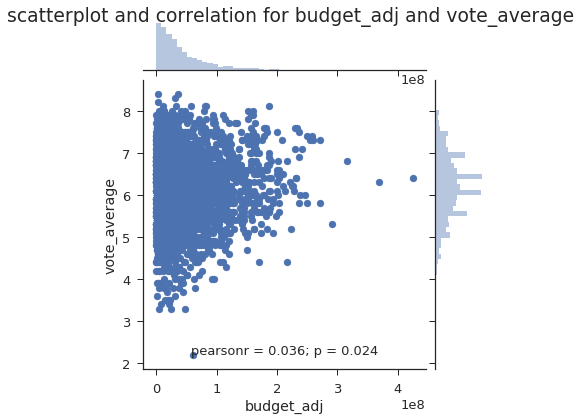

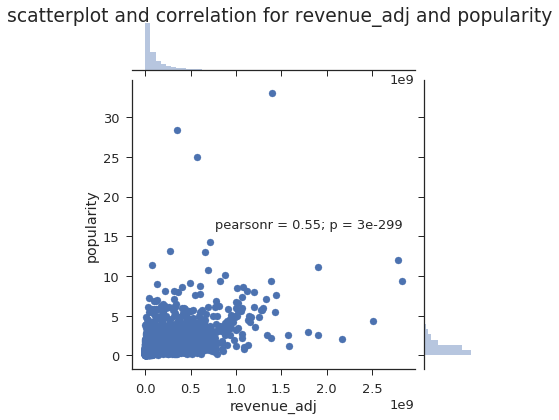

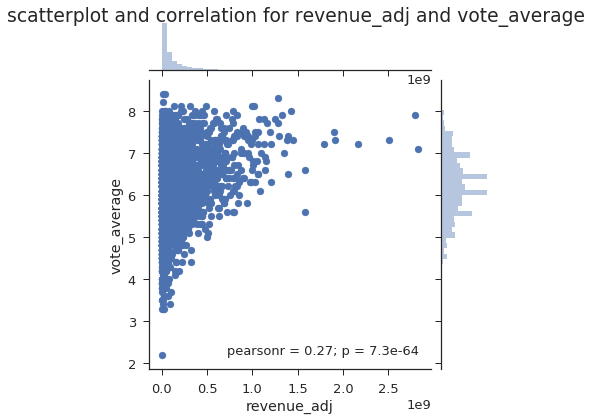

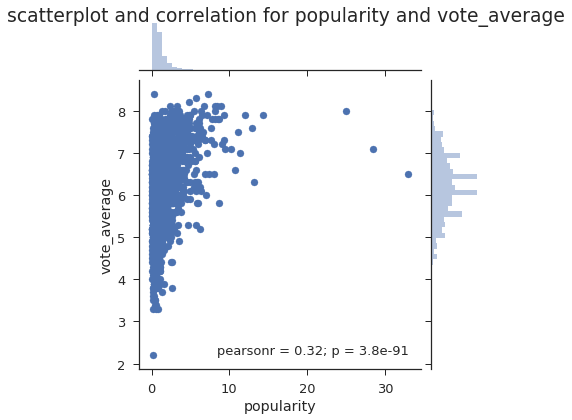

In [48]:
aux_df = mydata[['revenue_adj', 'budget_adj', 'popularity', 'vote_average']]

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3, style="ticks")


f1 = sns.jointplot(x = "budget_adj", y = "revenue_adj", kind = "scatter", data = aux_df)
f1.fig.suptitle('scatterplot and correlation for budget_adj and revenue_adj')

f2 = sns.jointplot(x = "budget_adj", y = "popularity", kind = "scatter", data = aux_df)
f2.fig.suptitle('scatterplot and correlation for budget_adj and popularity')
f3 = sns.jointplot(x = "budget_adj", y = "vote_average", kind = "scatter", data = aux_df)
f3.fig.suptitle('scatterplot and correlation for budget_adj and vote_average')

f4 = sns.jointplot(x = "revenue_adj", y = "popularity", kind = "scatter", data = aux_df)
f4.fig.suptitle('scatterplot and correlation for revenue_adj and popularity')
f5 = sns.jointplot(x = "revenue_adj", y = "vote_average", kind = "scatter", data = aux_df)
f5.fig.suptitle('scatterplot and correlation for revenue_adj and vote_average')

f6 = sns.jointplot(x = "popularity", y = "vote_average", kind = "scatter", data = aux_df)
f6.fig.suptitle('scatterplot and correlation for popularity and vote_average')

In [25]:
#There is a positive correlation between the adjasted revenue, adjasted budget and popularity. Moroever there is a weak positive correlation between the average votes with the other 3 variables (adjasted revenue, adjasted budget and popularity)

<a id='conclusions'></a>
## Conclusions
This dataset is very rich in information.and it's size is sufficient but Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation. There are many famous actors like Robert De Niro who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years. Finally there is a positive correlation between some of the features of the TMDb dataset.
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0